In [31]:
import tensorflow as tf
import PIL
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np
from subprocess import call
import scipy
import matplotlib.pyplot as plt
from matplotlib import cm
import math
from decimal import Decimal, localcontext

from pathlib import Path




def opF(path):
    p = Path(path)
    os.startfile(p) # for Windows

In [32]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [33]:
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

In [34]:
x = Dropout(rate=0.4)(model.output)
# This determines the number of outputs, and thus the number of categories, in my test case 2: dog or cat
x = Dense(4)(x)
x = Softmax()(x)
model= Model(model.inputs, x)

In [35]:
for layer in model.layers[:-3]:
    layer.trainable = False

In [36]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy'
)

In [37]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    'Images', 
    target_size=(224, 224),
    save_to_dir='./training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    'Images',
    target_size=(224, 224),
    save_to_dir='./validation_aug',
    subset='validation'
) 

Found 818 images belonging to 4 classes.
Found 89 images belonging to 4 classes.


In [38]:
batch_size = 32

history = model.fit(
    x=training,
    steps_per_epoch=training.samples // batch_size,
    # this needs to be much higher than 1, but for demo here we'll keep it at this
    epochs=2,
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

Epoch 1/2
25/25 [==============================] - 17s 644ms/step - loss: 1.9265 - val_loss: 1.1099
Epoch 2/2
25/25 [==============================] - 14s 574ms/step - loss: 1.1296 - val_loss: 0.9212


In [65]:
random_wonyoung = random.choice(os.listdir('Images/wonyoung'))
wonyoung_path = os.path.join('Images/wonyoung',random_wonyoung)
wonyoung = load_image(wonyoung_path)

random_suda = random.choice(os.listdir('Images/suda'))
suda_path = os.path.join('Images/suda',random_suda)
suda = load_image(suda_path)

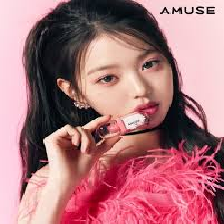

In [66]:
tf.keras.preprocessing.image.load_img(wonyoung_path, target_size=(224,224))

In [67]:
print(f'''wonyoung:{np.round(model.predict(wonyoung),2)}''')

1/1 [==============================] - 0s 32ms/step
wonyoung:[[0.07 0.09 0.26 0.57]]


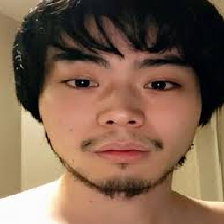

In [68]:
tf.keras.preprocessing.image.load_img(suda_path, target_size=(224,224))

In [69]:
print(f'''suda:{np.round(model.predict(suda),2)}''')

1/1 [==============================] - 0s 21ms/step
suda:[[0.14 0.28 0.26 0.32]]


In [73]:
jx_path = 'Images/1.jpg'
jx = load_image(jx_path)

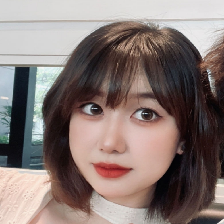

In [74]:
tf.keras.preprocessing.image.load_img(fox_path, target_size=(224,224))

In [75]:
print(f'''jx:{np.round(model.predict(jx),2)}''')

1/1 [==============================] - 0s 16ms/step
jx:[[0.11 0.07 0.26 0.55]]


In [76]:
doge_path = 'Images/4.jpg'
doge = load_image(doge_path)

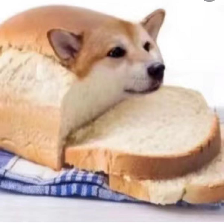

In [77]:
tf.keras.preprocessing.image.load_img(doge_path, target_size=(224,224))

In [78]:
print(f'''doge:{np.round(model.predict(doge),2)}''')

1/1 [==============================] - 0s 25ms/step
doge:[[0.1  0.36 0.53 0.01]]
